<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Recommender Systems II - Collaborative Filtering

_Authors: David Yerrington(SF)_

---

<a id="learning-objectives"></a>
### Learning Objectives
*After this lesson, you will be able to:*
- Explain common recommendation techniques
    - Collaborative based
    - Content based
- Types of data used for recommendation, and their tradeoffs
    - Explicit
    - Implicit
- Implement a basic collaborative recommender



## We need data to recommend!

* Preferences
* Ratings
* Item meta-data
* User Behavior


## Dot Product Review

By now this should be a familiar idea:

# $\vec A\cdot\vec B=A_xB_x+A_yB_y$

Here are a few examples in 2D, with the cooresponding angle, $\theta$, between the two vectors.

<img src="attachment:image.png" width="200">

## Distance Metrics: Cosine Similarity

There are many distance metrics we can use to measure similarity between items or users.  One similarity metric we will use a bit in this lesson will bo cosine similarity.

## $$
cos(\theta) = \frac{A \cdot B}{\left\| A\right\| \left\| B\right\| } \
= \frac{\sum{A_i^2B_i^2}}{\sqrt{\sum{A_i^2}}\sqrt{\sum{B_i^2}}}
$$

<img src="attachment:image.png" width="200">

### Similarity on familiar data
Since we've been working with text recently, here's a basic example of applying cosine similarity to text data.

> **d** is closest to **a**.  You can also try changing the offset that gets assigned to _target_.  Try updating the sentence target to offset **2**, sentence **c**.

In [1]:
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd, numpy as np


sentences = [
    ("a", "Matt and Justin hang 10 at the beach"),
    ("b", "Matt rides a skateboard"),
    ("c", "Skateboards are super cool, like Riley"),
    ("d", "Matt and Justin teach at the beach")
]

df = pd.DataFrame(sentences, columns=["sample", "sentence"])
df = df.set_index("sample")

# Setup vectorizer...
vect = CountVectorizer(stop_words=None)
X = vect.fit_transform(df['sentence']).toarray()

df = pd.DataFrame(X, columns=vect.get_feature_names(), index=df.index)
df
# Similarity of sentence "d" to all sentences
# A:
cosine_similarity(df, df)

array([[1.        , 0.20412415, 0.        , 0.80178373],
       [0.20412415, 1.        , 0.        , 0.21821789],
       [0.        , 0.        , 1.        , 0.        ],
       [0.80178373, 0.21821789, 0.        , 1.        ]])

In [2]:
pairwise_distances(X, X, metric="euclidean")

array([[0.        , 3.        , 3.74165739, 1.73205081],
       [3.        , 0.        , 3.        , 2.82842712],
       [3.74165739, 3.        , 0.        , 3.60555128],
       [1.73205081, 2.82842712, 3.60555128, 0.        ]])

## Common Recommender User-Item Collaborative Filtering

In [3]:
import matplotlib.pyplot as plt, seaborn as sns
from IPython.display import display
%matplotlib inline

In [4]:
users = [
    ("Chuck", 1, 1, 0, 0, 0, 0),
    ("Nancy", 1, 0, 0, 0, 1, 0),
    ("Divya", 0, 0, 0, 1, 1, 1),
    ("Pat", 0, 0, 1, 0, 1, 1),
]

# setup dataframe
users = pd.DataFrame(users, columns=["user", "Friday the 13th", "Nightmare on Elm St", "Dawn of the Dead", "Hiro Dreams of Sushi", "180 South", "Exit Through the Giftshop"])
users = users.set_index("user")
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,1,1,0,0,0,0
Nancy,1,0,0,0,1,0
Divya,0,0,0,1,1,1
Pat,0,0,1,0,1,1


### User Similarity

Text(0.5, 1.0, 'User Cosine Similarity')

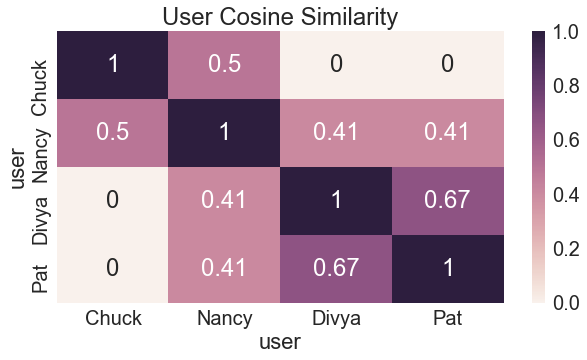

In [5]:
# A: build similarity matrix
sim_matrix = cosine_similarity(users, users)
users_sim = pd.DataFrame(sim_matrix, 
                         columns=users.index, index=users.index)

# Plot the matrix
sns.set(font_scale=1) ## Reset the font scale 1st
sns.set(font_scale=2)
plt.figure(figsize=(10,5))
sns.heatmap(users_sim, annot=True)
plt.title("User Cosine Similarity")

### We could make friend recommendations at this point
If we wanted to base our friend suggestions on movie preferences, we could do this.

In [6]:
users_sim.query("user == '%s'" % "Chuck").T.sort_values(
    "Chuck", ascending=False)

user,Chuck
user,
Chuck,1.0
Nancy,0.5
Divya,0.0
Pat,0.0


In [7]:
# A: Build quick function to look at users sim
top_n_users = lambda user: users_sim.query(
    "user == '%s'" % user).T.sort_values(user, ascending=False)
display("Top Similar Users", top_n_users("Chuck"))
display("Common Movies", 
        users.T[users.query("index == 'Chuck'").any(0)])

'Top Similar Users'

user,Chuck
user,
Chuck,1.0
Nancy,0.5
Divya,0.0
Pat,0.0


'Common Movies'

user,Chuck,Nancy,Divya,Pat
Friday the 13th,1,1,0,0
Nightmare on Elm St,1,0,0,0


In [8]:
# Display function outputs
display("Top Similar Users", top_n_users("Nancy"))
display("Common Movies", 
        users.T[users.query("index == 'Nancy'").any(0)])


'Top Similar Users'

user,Nancy
user,
Nancy,1.000000
Chuck,0.500000
Divya,0.408248
Pat,0.408248


'Common Movies'

user,Chuck,Nancy,Divya,Pat
Friday the 13th,1,1,0,0
180 South,0,1,1,1


In [9]:
# Investigate "Pat"
display("Top Similar Users", top_n_users("Pat"))
display("Common Movies", 
        users.T[users.query("index == 'Pat'").any(0)])


'Top Similar Users'

user,Pat
user,
Pat,1.000000
Divya,0.666667
Nancy,0.408248
Chuck,0.000000


'Common Movies'

user,Chuck,Nancy,Divya,Pat
Dawn of the Dead,0,0,0,1
180 South,0,1,1,1
Exit Through the Giftshop,0,0,1,1


### <img src="https://snag.gy/tGMEZo.jpg" style="float: left; width: 25px; margin-right: 5px;">Which movies should we recommend to whom? (thread)
> Does it matter which similarity vector we choose or can all of them be useful in some way?

In [10]:
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,1,1,0,0,0,0
Nancy,1,0,0,0,1,0
Divya,0,0,0,1,1,1
Pat,0,0,1,0,1,1


In [11]:
users_sim

user,Chuck,Nancy,Divya,Pat
user,,,,
Chuck,1.0,0.500000,0.000000,0.000000
Nancy,0.5,1.000000,0.408248,0.408248
Divya,0.0,0.408248,1.000000,0.666667
Pat,0.0,0.408248,0.666667,1.000000


### We'll add a few movies and make _Pat_ watch them AND _like_ them.
In effect, expanding the number of movies that other users haven't seen.

> However, what might this do to our user similarity space?  What will happen?  Will Divya and Pat still be friends after!?

> "After adding more movies (features) to our rating space, how similar will Divya and Pat be as a result?" 

> "More importantly, do you think it's a good idea to recommend to Divya, what Pat likes before or after expending the movies list?"

In [12]:
# The 4th user is Pat
users['This is Justin Bieber']        =  [0, 0, 0, 1] # Thanks for watching Pat!
users['Nanook of the North']          =  [0, 0, 0, 1] # Thanks for watching Pat!
users['Sharknado: Directors Cut']     =  [0, 0, 0, 1] # Thanks for watching Pat!
users['Snowpiercer: The Musical']     =  [0, 0, 0, 1] # Thanks for watching Pat!
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop,This is Justin Bieber,Nanook of the North,Sharknado: Directors Cut,Snowpiercer: The Musical
user,,,,,,,,,,
Chuck,1,1,0,0,0,0,0,0,0,0
Nancy,1,0,0,0,1,0,0,0,0,0
Divya,0,0,0,1,1,1,0,0,0,0
Pat,0,0,1,0,1,1,1,1,1,1


In [13]:
users_sim = pd.DataFrame(cosine_similarity(users, users), 
                         columns=users.index, index=users.index)

In [14]:
# Display "Divya", after
display("Top Similar Users", top_n_users("Divya"))
display("Common Movies", users.T[users.query("index == 'Divya'").any(0)])

'Top Similar Users'

user,Divya
user,
Divya,1.000000
Pat,0.436436
Nancy,0.408248
Chuck,0.000000


'Common Movies'

user,Chuck,Nancy,Divya,Pat
Hiro Dreams of Sushi,0,0,1,0
180 South,0,1,1,1
Exit Through the Giftshop,0,0,1,1


We could scale the original preference matrix of 0's and 1's by the values from any vector in the user similarity matrix, then aggregate these projected scores by column to learn which movies are good to recommend based on user similarity. **We are going to code this idea now!**

## Collaborative Filtering

1. Pick a user:  Divya (We will call her the **"active"** user)
1. Calculate similarity of all users to Divya (the active user)
1. Select only the vector in the similarty matrix for the **active user**
1. Scale the transpose of the original user / movie matrix by the similarity vector
1. Transpose the resulting matrix back to it's original form
1. Aggregate the the updated transposed user / movie matrix (sum, mean, or median can work)
1. Your aggregate stat becomes your ordinal.  Sort by that ordinal!

### Exploring CF with ratings data

In [15]:
users = [
    ("Chuck", 4.5, 5, 0, 0, 0, 0),
    ("Nancy", 3.2, 0, 0, 0, 5.0, 0),
    ("Divya", 0, 0, 0, 3, 2.5, 2.0),
    ("Pat", 0, 0, 1.5, 0, 4.5, 3.5),
]

# Put ratings in dataframe
users = pd.DataFrame(users, 
                     columns=["user", 
                              "Friday the 13th", 
                              "Nightmare on Elm St", 
                              "Dawn of the Dead", 
                              "Hiro Dreams of Sushi", 
                              "180 South", 
                              "Exit Through the Giftshop"])
users = users.set_index("user")
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,4.5,5,0.0,0,0.0,0.0
Nancy,3.2,0,0.0,0,5.0,0.0
Divya,0.0,0,0.0,3,2.5,2.0
Pat,0.0,0,1.5,0,4.5,3.5


## Calculate Users Similarity
Using cosine similarity again.  Adding index and columns matching user label vector for reference.

In [16]:
## Check out "Dawn of The Dead"
# Create users_sim
users_sim = pd.DataFrame(cosine_similarity(users, users), 
                         columns=users.index, index=users.index)
users_sim

user,Chuck,Nancy,Divya,Pat
user,,,,
Chuck,1.000000,0.360608,0.000000,0.000000
Nancy,0.360608,1.000000,0.479929,0.642965
Divya,0.000000,0.479929,1.000000,0.705619
Pat,0.000000,0.642965,0.705619,1.000000


## Still not bad but can we get some projected ratings?
From here we only need to scale ratings to users who are similar to Divya.

In [17]:
display("Top Similar Users", top_n_users("Divya"))
display("Common Movies", users.T[users.query("index == 'Divya'").any(0)])

'Top Similar Users'

user,Divya
user,
Divya,1.000000
Pat,0.705619
Nancy,0.479929
Chuck,0.000000


'Common Movies'

user,Chuck,Nancy,Divya,Pat
Hiro Dreams of Sushi,0.0,0.0,3.0,0.0
180 South,0.0,5.0,2.5,4.5
Exit Through the Giftshop,0.0,0.0,2.0,3.5


In [18]:
users_sim['Nancy']

user
Chuck    0.360608
Nancy    1.000000
Divya    0.479929
Pat      0.642965
Name: Nancy, dtype: float64

In [19]:
users.T

user,Chuck,Nancy,Divya,Pat
Friday the 13th,4.5,3.2,0.0,0.0
Nightmare on Elm St,5.0,0.0,0.0,0.0
Dawn of the Dead,0.0,0.0,0.0,1.5
Hiro Dreams of Sushi,0.0,0.0,3.0,0.0
180 South,0.0,5.0,2.5,4.5
Exit Through the Giftshop,0.0,0.0,2.0,3.5


In [20]:
# Investigate user recs
users_rec = users.T * users_sim['Nancy']
users_rec.T.mean().sort_values(ascending=False)

180 South                    2.273291
Friday the 13th              1.205684
Exit Through the Giftshop    0.802558
Nightmare on Elm St          0.450760
Hiro Dreams of Sushi         0.359947
Dawn of the Dead             0.241112
dtype: float64

### Is this useful though?
> Consider the performance of what we've done so far as we go forward.  Yes this also works with negative ratings and we could even normalize / standardize this data so that the mean is 0 and we only consider users that are above 0 as "good reviews".

## Summary

Rarely are recommender systems a single solution, but a collection of systems that work together based on the objectives of business.

#### Some closing questions

- What are some problems with recommenders that we found?
- What are good recommendations exactly?
- What is the hardest thing to understand about recommenders?

### Recommended Reading

* [Evaluation of Item-Based Top-N Recommendation
Algorithms - George Karypis](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.554.1671&rep=rep1&type=pdf)
* [Intro to Collaborative Filtering](http://blog.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/)
* [Winning the Netflix Prize: A Summary](http://blog.echen.me/2011/10/24/winning-the-netflix-prize-a-summary/)